# Einleitung
- <a href="https://colab.research.google.com/github/gjo-se/images-multiclass/blob/master/notebooks/experiments/00_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
- Ziel des Notebooks und des Experiments Kontext und Motivation
- ganz zum Schluss per ChatGPT erstellen


# Imports & Setup


In [1]:
import os
import subprocess
from src.data import Dataset
from src.eda import EDA
from src.log import SuppressTFLogs
from src.setup import Environment

## Clone git on Colab

In [2]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
if IN_COLAB:

    repo_url = "https://github.com/gjo-se/images-multiclass.git"
    target_dir = "/content"
    notebook_dir = "notebooks/experiments/"

    if not os.path.exists(os.path.join(target_dir, "src")):
        print(f"Cloning repository {repo_url} to {target_dir}/tmp_clone ...")
        subprocess.check_call(["git", "clone", repo_url, f"{target_dir}/tmp_clone"])
        for item in os.listdir(f"{target_dir}/tmp_clone"):
            subprocess.check_call(["mv", f"{target_dir}/tmp_clone/{item}", target_dir])
        subprocess.check_call(["rm", "-rf", f"{target_dir}/tmp_clone"])
    else:
        print(f"Projekt bereits in {target_dir} vorhanden.")

    os.chdir(os.path.join(target_dir, notebook_dir))
    print(f"Changed working directory to {os.getcwd()}")
else:
    print("clone_and_cd_repo() wird nur auf Google Colab ausgeführt.")

clone_and_cd_repo() wird nur auf Google Colab ausgeführt.


## Setup

In [3]:
Environment().setup();

Notebook last run (end-to-end): 2026-01-31 11:14:19.567600
TensorFlow Version: 2.20.0


# Dataset


## Load Dataset

In [4]:
DATASET_NAME = "food101"
ds = Dataset()
ds.load_dataset(DATASET_NAME, _only_on_colab=False);

Load dataset https://www.tensorflow.org/datasets/catalog/food101


## Explore Data

In [5]:
eda = EDA(ds)

### Dataset

In [6]:
features_dict = eda.show_features_dict()
features_dict

,Attribut,Wert
0,name,food101
1,full_name,food101/2.0.0
2,size,4.65 GiB
3,features,"(image, label)"
4,supervised_keys,"(image, label)"
5,disable_shuffling,False


In [7]:
eda.show_features()
eda.show_splits()
eda.show_data_dir()
eda.show_sample_classes()


Features:
  image: Image(shape=(None, None, 3), dtype=uint8)
  label: ClassLabel(shape=(), dtype=int64, num_classes=101)

Splits:
  train: <SplitInfo num_examples=75750, num_shards=32>
  validation: <SplitInfo num_examples=25250, num_shards=16>

Data Dir:
  /Users/gregoryjodaily/tensorflow_datasets/food101/2.0.0

Sample Classes:
  ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [8]:
# with SuppressTFLogs():
#     eda.show_class_distribution("train");
#     eda.show_class_distribution("validation");

### Sample Group

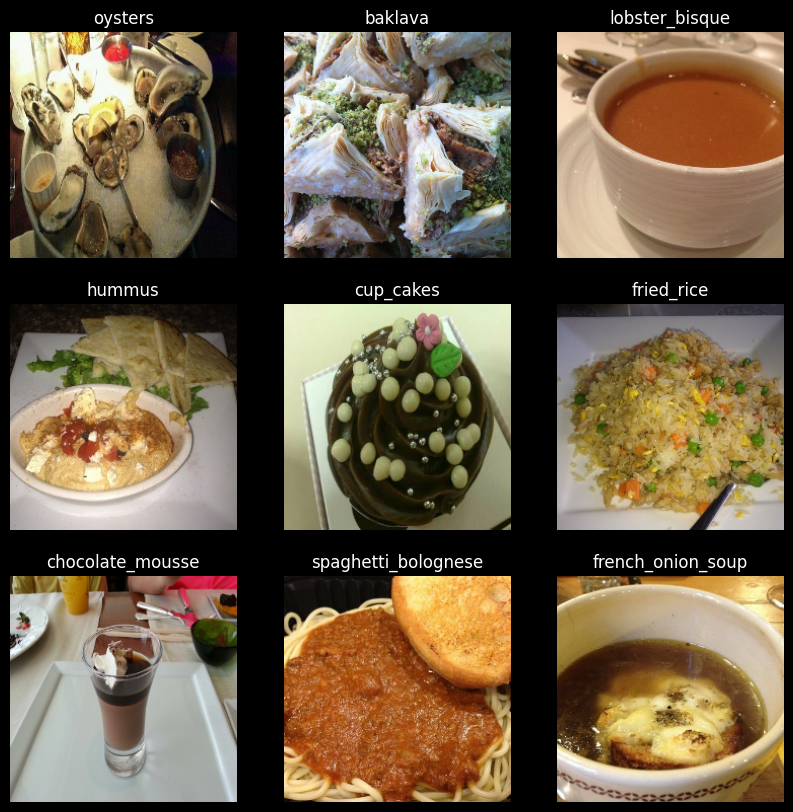

,Shape,dtype,Class name tensor,Class name string,Min,Max
0,"(224, 224, 3)",float32,69,oysters,0,255
1,"(224, 224, 3)",float32,2,baklava,0,255
2,"(224, 224, 3)",float32,60,lobster_bisque,4,255
3,"(224, 224, 3)",float32,57,hummus,0,255
4,"(224, 224, 3)",float32,29,cup_cakes,0,255
5,"(224, 224, 3)",float32,44,fried_rice,0,255
6,"(224, 224, 3)",float32,22,chocolate_mousse,0,255
7,"(224, 224, 3)",float32,90,spaghetti_bolognese,0,255
8,"(224, 224, 3)",float32,41,french_onion_soup,0,255


In [11]:
eda.show_random_samples(_count=9)

# Modellierung
Definition und Visualisierung des Modells
Kompilieren des Modells (Loss, Optimizer, Metriken)


# Training
Training des Modells mit Trainingsdaten
Visualisierung des Trainingsverlaufs (Loss, Accuracy)


# Evaluation
Bewertung des Modells auf Validierungs- und Testdaten
Darstellung von Metriken und ggf. Confusion Matrix


# Ergebnisse und Interpretation
Zusammenfassung der wichtigsten Erkenntnisse
Diskussion von Stärken, Schwächen und möglichen Verbesserungen


# Speicherung und Laden von Modellen
Speichern des trainierten Modells
Laden und Testen des gespeicherten Modells


# Fazit und Ausblick
Kurzes Fazit und mögliche nächste Schritte


# Anhang
Zusätzliche Visualisierungen, Code-Snippets oder Referenzen